<a href="https://colab.research.google.com/github/timeismoney4tw/-TIM4TW/blob/main/%E9%97%9C%E5%B1%B1%E7%B1%B3%E5%83%B9%E6%A0%BC%E9%A0%90%E6%B8%AC_vs_%E5%AF%A6%E9%9A%9B%E5%83%B9%E6%A0%BC(%E6%9C%9F%E6%9C%AB%E5%A0%B1%E5%91%8A).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 要求：python 3.8+、tensorflow 已安裝 (pip install tensorflow)、scikit-learn、pandas、matplotlib
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os # Added import for os module
from google.colab import files # Added import for files module

# 1) 讀取資料（請確認路徑正確）
file_path = "/content/rice_price_2020_2025.csv"

if not os.path.exists(file_path):
    print(f"檔案 '{file_path}' 不存在。請上傳文件。")
    try:
        uploaded = files.upload()
        if uploaded:
            # Assuming the user uploads the file with the expected name
            uploaded_file_name = list(uploaded.keys())[0]
            if uploaded_file_name != os.path.basename(file_path):
                print(f"警告: 上傳的檔案名稱為 '{uploaded_file_name}', 但程式預期名稱為 '{os.path.basename(file_path)}'。請檢查檔案名稱或修改程式碼中的路徑。")
                # If the uploaded file is not named as expected, try to move it
                # This is a common Colab behavior if the file is directly uploaded and overwrites old path
                # However, for simplicity and to avoid unexpected overwrites, we will just warn
            print(f"檔案 '{uploaded_file_name}' 已成功上傳。")
        else:
            raise FileNotFoundError(f"未上傳檔案。請上傳 '{file_path}'。")
    except Exception as e:
        print(f"檔案上傳失敗或被取消: {e}")
        # Re-raise the original FileNotFoundError or a more specific one
        raise FileNotFoundError(f"無法找到或上傳檔案: {file_path}") from e

df = pd.read_csv(file_path)   # 若在本機，改成 "rice_price_2020_2025.csv"，並確認檔案已上傳或路徑正確
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values("date")

prices = df['price'].values.reshape(-1, 1)

# 2) 正規化
scaler = MinMaxScaler()
scaled = scaler.fit_transform(prices)

# 3) 建立滑動視窗
def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

window = 12
X, y = create_sequences(scaled, window)

# 4) 建模型（簡潔版 Keras LSTM）
model = Sequential([
    LSTM(32, return_sequences=False, input_shape=(window, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 5) 訓練（可調 epochs、batch_size）
history = model.fit(X, y, epochs=40, batch_size=8, verbose=1)

# 6) 逐步預測未來 12 個月
future_steps = 12
seq = scaled[-window:].reshape(1, window, 1)
future_preds = []

for _ in range(future_steps):
    p = model.predict(seq, verbose=0)
    future_preds.append(p.item())
    seq = np.append(seq[:, 1:, :], [[[p.item()]]], axis=1)


檔案 '/content/rice_price_2020_2025.csv' 不存在。請上傳文件。


Saving rice_price_2020_2025.csv to rice_price_2020_2025.csv
檔案 'rice_price_2020_2025.csv' 已成功上傳。


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2294
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1130
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0706
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0768
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0727
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0687
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0669
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0737
Epoch 9/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0661
Epoch 10/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0583 
Epoch 11/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0568 
Epoch 12/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0565 
Epoch 13/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0550 
Epoch 14/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0533 
Epoch 15/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0533 
Epoch 16/40
8/8 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from font(s) DejaVu Sans.
  fig.canvas

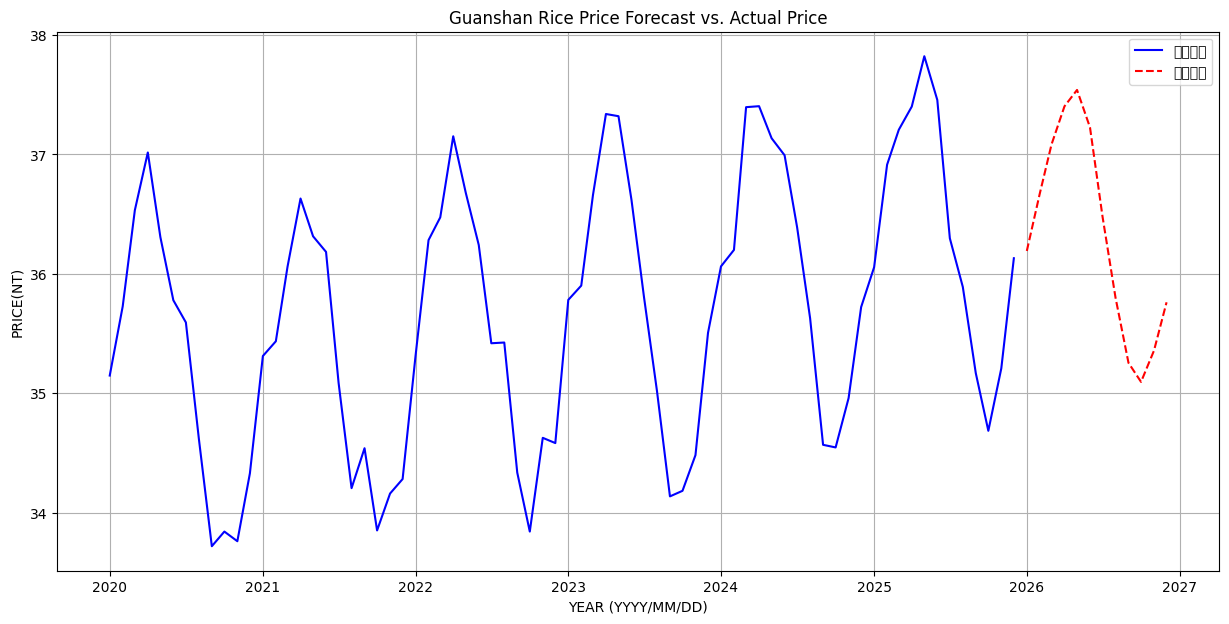

In [2]:
# 7) 反正規化預測結果
actual_prices = scaler.inverse_transform(scaled)
predicted_prices = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# 8) 建立未來日期
last_date = df['date'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='MS')[1:]

# 設定中文字體
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams['axes.unicode_minus'] = False # 解決負號亂碼問題

# 重新繪製圖表
plt.figure(figsize=(15, 7))
plt.plot(df['date'], actual_prices, label='實際價格', color='blue')
plt.plot(future_dates, predicted_prices, label='預測價格', color='red', linestyle='--')

plt.title('Guanshan Rice Price Forecast vs. Actual Price')
plt.xlabel('YEAR (YYYY/MM/DD)')
plt.ylabel('PRICE(NT)')
plt.legend()
plt.grid(True)
plt.show()

這些程式碼段負責設定圖表大小、繪製實際價格（藍線）和預測價格（紅虛線）、設定標題和軸標籤、顯示圖例和網格，最後展示圖表。

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from font(s) DejaVu Sans.
  fig.canvas

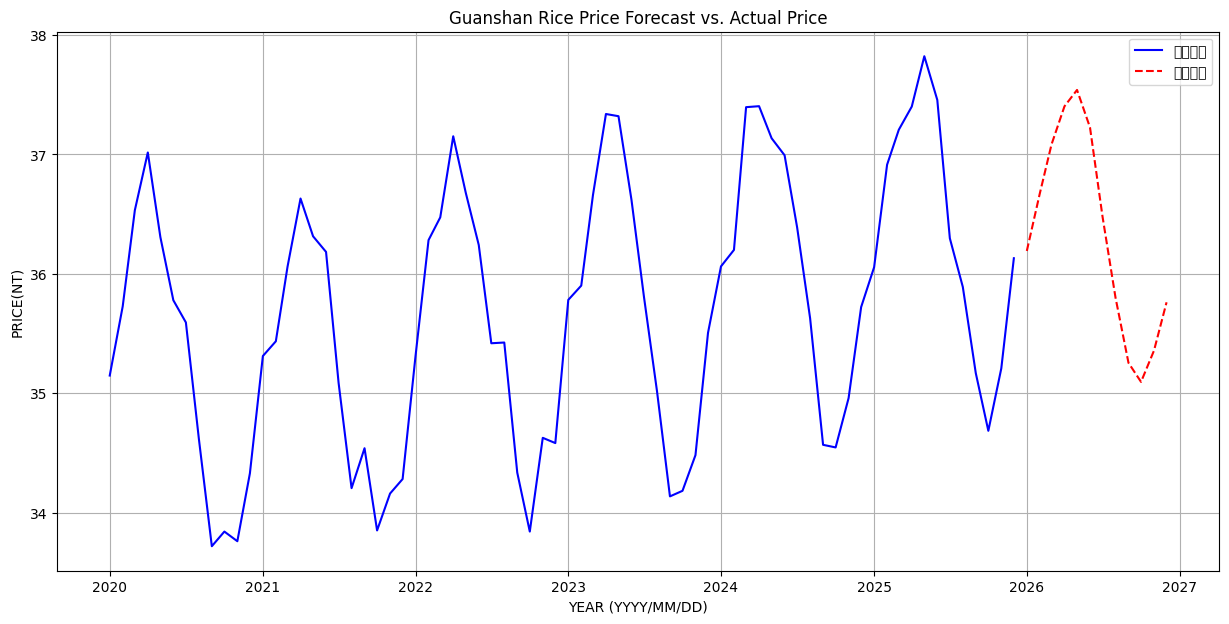

In [3]:
# 7) 反正規化預測結果
actual_prices = scaler.inverse_transform(scaled)
predicted_prices = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# 8) 建立未來日期
last_date = df['date'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='MS')[1:]

# 設定中文字體
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams['axes.unicode_minus'] = False # 解決負號亂碼問題

# 9) 繪製結果
plt.figure(figsize=(15, 7))
plt.plot(df['date'], actual_prices, label='實際價格', color='blue')
plt.plot(future_dates, predicted_prices, label='預測價格', color='red', linestyle='--')

plt.title('Guanshan Rice Price Forecast vs. Actual Price')
plt.xlabel('YEAR (YYYY/MM/DD)')
plt.ylabel('PRICE(NT)')
plt.legend()
plt.grid(True)
plt.show()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 5s (11.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fo

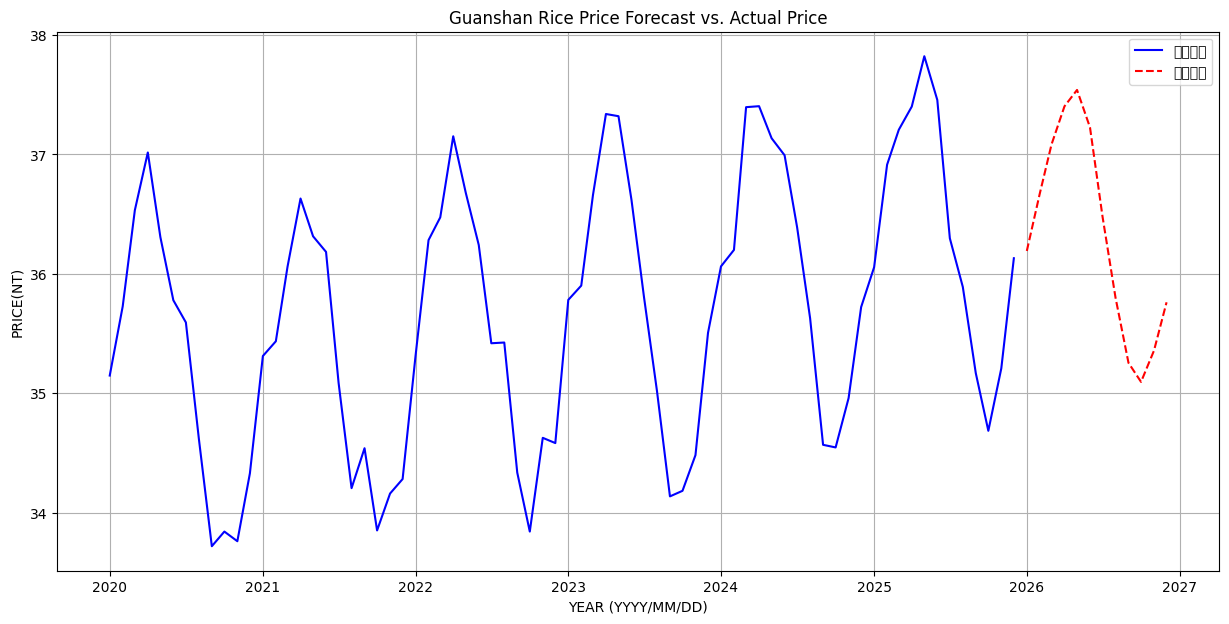

In [4]:
# 安裝中文字體
!sudo apt-get install -y fonts-noto-cjk
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 重新配置 Matplotlib 使用新字體
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams['axes.unicode_minus'] = False # 解決負號亂碼問題

# 重新繪製圖表
plt.figure(figsize=(15, 7))
plt.plot(df['date'], actual_prices, label='實際價格', color='blue')
plt.plot(future_dates, predicted_prices, label='預測價格', color='red', linestyle='--')

plt.title('Guanshan Rice Price Forecast vs. Actual Price')
plt.xlabel('YEAR (YYYY/MM/DD)')
plt.ylabel('PRICE(NT)')
plt.legend()
plt.grid(True)
plt.show()